In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [47]:
df_filtered = df[['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

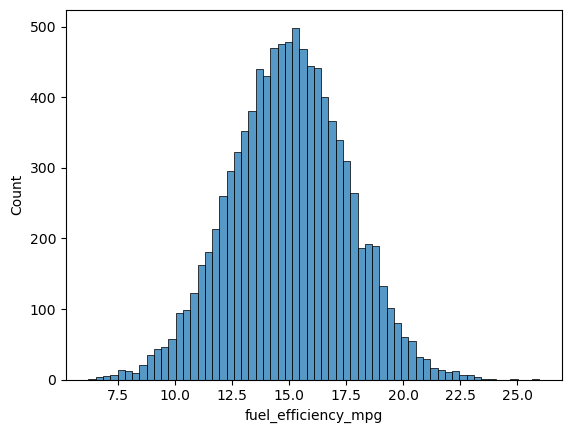

In [49]:
sns.histplot(df_filtered.fuel_efficiency_mpg)

In [53]:
df_filtered.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [54]:
df['horsepower'].median()

149.0

In [55]:
df_shuffled = cfe.sample(frac=1, random_state=42).reset_index(drop=True)

In [56]:
n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

df_train = df_shuffled[:n_train]
df_val = df_shuffled[n_train:n_train + n_val]
df_test = df_shuffled[n_train + n_val:]

features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    reg[0, 0] = 0
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def predict(X, w0, w):
    return w0 + X.dot(w)


In [57]:
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()
df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

X_train = df_train_0[features].values
X_val = df_val_0[features].values
y_train = df_train[target].values
y_val = df_val[target].values

w0, w = train_linear_regression(X_train, y_train)
y_pred = predict(X_val, w0, w)
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_0 = round(rmse_0, 2)

print(f"RMSE with 0: {rmse_0}")

RMSE with 0: 0.52


In [58]:
mean_hp = df_train['horsepower'].mean()

df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_hp)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_hp)

X_train = df_train_mean[features].values
X_val = df_val_mean[features].values
y_train = df_train[target].values
y_val = df_val[target].values

w0, w = train_linear_regression(X_train, y_train)
y_pred = predict(X_val, w0, w)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_mean = round(rmse_mean, 2)

print(f"RMSE with mean: {rmse_mean}")


RMSE with mean: 0.46


In [59]:
# Question 5: Try different seeds

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    df_shuffled_temp = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    n = len(df_shuffled_temp)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    
    df_train_temp = df_shuffled_temp[:n_train]
    df_val_temp = df_shuffled_temp[n_train:n_train + n_val]
    
    df_train_temp = df_train_temp.copy()
    df_val_temp = df_val_temp.copy()
    df_train_temp['horsepower'] = df_train_temp['horsepower'].fillna(0)
    df_val_temp['horsepower'] = df_val_temp['horsepower'].fillna(0)
    
    X_train_temp = df_train_temp[features].values
    X_val_temp = df_val_temp[features].values
    y_train_temp = df_train_temp[target].values
    y_val_temp = df_val_temp[target].values
    
    w0, w = train_linear_regression(X_train_temp, y_train_temp)
    y_pred = predict(X_val_temp, w0, w)
    rmse = np.sqrt(mean_squared_error(y_val_temp, y_pred))
    rmse = round(rmse, 2)
    rmse_scores.append(rmse)
    print(f"Seed {seed}: RMSE={rmse}")

std = np.std(rmse_scores)
std = round(std, 3)
print(f"\nStandard deviation: {std}")


Seed 0: RMSE=0.52
Seed 1: RMSE=0.52
Seed 2: RMSE=0.52
Seed 3: RMSE=0.52
Seed 4: RMSE=0.51
Seed 5: RMSE=0.53
Seed 6: RMSE=0.53
Seed 7: RMSE=0.51
Seed 8: RMSE=0.51
Seed 9: RMSE=0.51

Standard deviation: 0.007


In [60]:
df_shuffled_9 = df.sample(frac=1, random_state=9).reset_index(drop=True)

n = len(df_shuffled_9)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

df_train_9 = df_shuffled_9[:n_train]
df_val_9 = df_shuffled_9[n_train:n_train + n_val]
df_test_9 = df_shuffled_9[n_train + n_val:]

In [61]:
df_train_val = pd.concat([df_train_9, df_val_9]).reset_index(drop=True)

df_train_val['horsepower'] = df_train_val['horsepower'].fillna(0)
df_test_9 = df_test_9.copy()
df_test_9['horsepower'] = df_test_9['horsepower'].fillna(0)

X_train_val = df_train_val[features].values
X_test = df_test_9[features].values
y_train_val = df_train_val[target].values
y_test = df_test_9[target].values

w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred = predict(X_test, w0, w)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test = round(rmse_test, 2)

print(f"RMSE on test: {rmse_test}")


RMSE on test: 0.52
